# ML4DD Summer School Hackathon

The final days of the Machine Learning For Drug Discovery summer school ends with a hackathon. We will use Polaris as a tool to get the associated benchmarks and datasets. First things first, we will install Polaris from PyPi.

We next need to authenticate ourselves to Polaris. If you haven't done so yet, you can create an account at https://polarishub.io. Afterwards, you can simply run the command below.

In [56]:
!polaris login

2024-06-20 19:06:41.798 | INFO     | polaris.hub.client:login:285 - You are already logged in to the Polaris Hub as yakavetsiv (i.yakavets@gmail.com). Set `overwrite=True` to force re-authentication.


In [57]:
# @title Set an owner

owner = 'qumark' # @param {type:"string"}

print(f"You have set \"{owner}\" as the owner")

You have set "qumark" as the owner


# Solubility Benchmark

The first benchmark we will use is `polaris/adme-fang-solu-1`. The associated page for this benchmark on the Polaris Hub can be found at https://polarishub.io/benchmarks/polaris/adme-fang-solu-1.

In [3]:
import polaris as po
import datamol as dm
import numpy as np

/home/ubuntu/micromamba/envs/moml-mark/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
benchmark = po.load_benchmark("polaris/adme-fang-solu-1")

2024-06-20 16:33:20.114 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).
2024-06-20 16:33:20.124 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).


We will use Datamol's `dm.to_fp` to directly featurize the inputs.

In [5]:
train, test = benchmark.get_train_test_split(featurization_fn=dm.to_fp)
train[0]

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 1.567849451)

As a model, we will train a simple Random Forest model from scikit-learn.

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=5)
model.fit(train.X, train.y)

RandomForestRegressor(max_depth=5)

Using that model, we can then generate our predictions for the test set.

In [7]:
y_pred = model.predict(test.X)

And finally, we evaluate our predictions

In [8]:
benchmark.evaluate?

Signature:
benchmark.evaluate(
    y_pred: Union[numpy.ndarray, dict[str, Union[numpy.ndarray, dict[str, numpy.ndarray]]], NoneType] = None,
    y_prob: Union[numpy.ndarray, dict[str, Union[numpy.ndarray, dict[str, numpy.ndarray]]], NoneType] = None,
) -> polaris.evaluate._results.BenchmarkResults
Docstring:
Execute the evaluation protocol for the benchmark, given a set of predictions.

info: What about `y_true`?
    Contrary to other frameworks that you might be familiar with, we opted for a signature that includes just
    the predictions. This reduces the chance of accidentally using the test targets during training.

For this method, we make the following assumptions:

1. There can be one or multiple test set(s);
2. There can be one or multiple target(s);
3. The metrics are _constant_ across test sets;
4. The metrics are _constant_ across targets;
5. There can be metrics which measure across tasks.

Args:
    y_pred: The predictions for the test set, as NumPy arrays.
        If the

In [9]:
results = benchmark.evaluate(y_pred)
results

{
  "name": null,
  "description": "",
  "tags": [],
  "user_attributes": {},
  "owner": null,
  "polaris_version": "dev",
  "benchmark_name": "adme-fang-SOLU-1",
  "benchmark_owner": {
    "slug": "polaris",
    "external_id": "org_2gtoaJIVrgRqiIR8Qm5BnpFCbxu",
    "type": "organization"
  },
  "github_url": null,
  "paper_url": null,
  "contributors": null,
  "artifact_id": null,
  "benchmark_artifact_id": "polaris/adme-fang-solu-1",
  "results": [
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "mean_absolute_error",
      "Score": 0.4897855072
    },
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "mean_squared_error",
      "Score": 0.4794379904
    },
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "r2",
      "Score": 0.1157195157
    },
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "spearmanr",
      "Score": 0.3601292076
    },
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "pearsonr",
      "Score": 0.4103726356
    },
    {
      "Test set": "test",
      "Target label": "LOG_SOLUBILITY",
      "Metric": "explained_var",
      "Score": 0.1225186278
    }
  ]
}

There are multiple metadata fields we can fill in to provide additional information about these results.

In [10]:
results.name = "my-first-result"
results.description = "ECFP fingerprints with a Random Forest"

And finally - We can upload our results to the Hub! The results will be private.

In [11]:
results.upload_to_hub(owner=owner);

PolarisHubError: The request to the Polaris Hub failed. See the error message below for more details:
{
  "message": "Cannot create a result for this owner"
}

# Kinase Selectivity

The second benchmark we will use is `polaris/pkis1-kit-wt-mut-c-1`. Using this benchmark is very similar to before, except for one difference: This is a multi-task benchmark.

In [58]:
benchmark = po.load_benchmark("polaris/pkis1-kit-wt-mut-c-1")
train, test = benchmark.get_train_test_split(featurization_fn=dm.to_fp)
train[0]

2024-06-20 19:06:48.782 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).
2024-06-20 19:06:48.787 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).


(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 {'CLASS_KIT_(T6701_mutant)': 0.0,
  'CLASS_KIT_(V560G_mutant)': 0.0,
  'CLASS_KIT': 0.0})

As we can see, the targets are now returned to us as a dictionary. Let's train a multi-task model on this data! We first preprocess the data to be in a format we can use with scikit-learn.

In [59]:
ys = train.y
ys = np.stack([ys[target] for target in benchmark.target_cols], axis=1)
ys.shape

(277, 3)

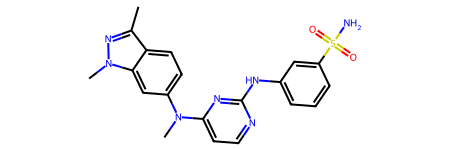

In [60]:
train, test = benchmark.get_train_test_split()
dm.to_mol(train[4][0])

In [64]:
[t[1]["CLASS_KIT"] for t in train]

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [43]:
smiles = [t[0] for t in train]
print(smiles)

['O=C(Nc1n[nH]c2cc(-c3ccc(F)cc3)ccc12)C1CC1', 'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OC3CCNCC3)c21', 'CN(C)c1cc2c(Nc3ccc4c(cnn4Cc4ccccc4)c3)ncnc2cn1', 'NS(=O)(=O)c1cccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c2)c1', 'Cc1nn(C)c2cc(N(C)c3ccnc(Nc4cccc(S(N)(=O)=O)c4)n3)ccc12', 'COc1ccc(C2=C(N3CCc4ccccc43)C(=O)NC2=O)cc1', 'CN(C)CCCNc1nccc(-c2c(-c3ccc(F)cc3)nn3cc(C(F)(F)F)ccc23)n1', 'c1ccc(-c2nc3n(c2-c2ccc4c(c2)OCO4)CCC3)nc1', 'COc1ccc2ncnc(Nc3ccc(OCc4ccccc4)cc3)c2c1', 'CCCN1CCC=C(c2ccc(Nc3nc(Nc4ccccc4C(N)=O)c4cc[nH]c4n3)c(C)c2)C1', 'COc1ccc(-c2nn3ncccc3c2-c2ccnc(Nc3ccc(F)c(F)c3)n2)cc1', 'CCOc1nccc2c1nc(-c1nonc1N)n2CC', 'COc1cc(N2CCN(C(C)C)CC2)ccc1Nc1nc(Nc2cccc(F)c2C(=O)O)c2cc[nH]c2n1', 'NC(=O)c1cccc(Nc2nccc(Nc3cccc4[nH]ncc34)n2)c1', 'COC(=O)c1sc(-n2cnc3cc(OC)c(OC)cc32)cc1OCc1ccccc1C(F)(F)F', '[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccccc6)c(Cl)c5)c4c3)o2)CC1', 'COc1cccc(-n2ncc3c(N/N=C/c4cccc(F)c4)ncnc32)c1', 'Cc1cc(O)cc(C)c1/C=C/c1cncc(C(N)=O)c1', 'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OC[C@H](N)c3ccc

In [54]:
from rdkit import Chem

for smile in smiles:
    canonical_smile = Chem.CanonSmiles(smile)
    if smile != canonical_smile:
        print(f"{smile} doesn't match {canonical_smile}")

Now that we're working with a multi-task dataset, it's also possible for these arrays to be sparse. Let's filter out any data points that doesn't have readouts for _all_ targets.

In [20]:
mask = ~np.any(np.isnan(ys), axis=1)
mask.sum()

276

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)
model.fit(train.X[mask], ys[mask])

RandomForestClassifier(max_depth=5)

In [21]:
y_pred = model.predict(test.X)
y_pred.shape

(87, 3)

In addition to `y_pred`, we also need to specify `y_prob` as this benchmark uses the AUROC measure.

In [22]:
y_prob = model.predict_proba(test.X)
y_prob = np.stack(y_prob, axis=1)
y_prob.shape

(87, 3, 2)

Polaris expects a dictionary, so let's convert our results again.

In [23]:
y_pred = {k: y_pred[:, idx] for idx, k in enumerate(benchmark.target_cols)}
y_prob = {k: y_prob[:, idx, 1] for idx, k in enumerate(benchmark.target_cols)}

And let's evaluate our predictions!

In [24]:
benchmark.evaluate(y_pred=y_pred, y_prob=y_prob)

{
  "name": null,
  "description": "",
  "tags": [],
  "user_attributes": {},
  "owner": null,
  "polaris_version": "dev",
  "benchmark_name": "pkis1-kit-wt-mut-c-1",
  "benchmark_owner": {
    "slug": "polaris",
    "external_id": "org_2gtoaJIVrgRqiIR8Qm5BnpFCbxu",
    "type": "organization"
  },
  "github_url": null,
  "paper_url": null,
  "contributors": null,
  "artifact_id": null,
  "benchmark_artifact_id": "polaris/pkis1-kit-wt-mut-c-1",
  "results": [
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "accuracy",
      "Score": 0.8390804598
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "accuracy",
      "Score": 0.8620689655
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "accuracy",
      "Score": 0.6206896552
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "f1",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "roc_auc",
      "Score": 0.6834637965
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "roc_auc",
      "Score": 0.7055555556
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "roc_auc",
      "Score": 0.7817059484
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "pr_auc",
      "Score": 0.3456398643
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "pr_auc",
      "Score": 0.3823925027
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "pr_auc",
      "Score": 0.6465385759
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "mcc",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(T6701_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT_(V560G_mutant)",
      "Metric": "cohen_kappa",
      "Score": 0.0
    },
    {
      "Test set": "test",
      "Target label": "CLASS_KIT",
      "Metric": "cohen_kappa",
      "Score": 0.0
    }
  ]
}

Although this works, we're not required to train a multi-task model. Polaris doesn't impose any restrictions on the methodology. You could e.g. also train multiple single-task models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

models = {target: RandomForestClassifier(max_depth=5) for target in benchmark.target_cols}
X = train.X

for target, model in models.items():
  y = train.y[target]
  mask = ~np.isnan(y)
  model.fit(X[mask], y[mask])

y_prob = {target: model.predict_proba(test.X)[:, 1] for target, model in models.items()}
y_pred = {target: model.predict(test.X) for target, model in models.items()}

results = benchmark.evaluate(y_pred=y_pred, y_prob=y_prob)

Finally, let's upload our results to the Hub again!

In [ ]:
results.name = "my-second-result"
results.description = "ECFP fingerprints with a Random Forest"

In [ ]:
results.upload_to_hub(owner=owner);

2024-06-20 13:00:01.006 | SUCCESS  | polaris.hub.client:upload_results:492 - Your result has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-kit-wt-mut-c-1/tWYuqlNYeoXeqKTKNN82D


The End.